In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import igraph as ig
from igraph import Graph
import cairocffi

In [2]:
associations = pd.read_csv('data/bio-pathways-associations.csv')
classes = pd.read_csv('data/bio-pathways-diseaseclasses.csv')
dmotifs = pd.read_csv('data/bio-pathways-diseasemotifs.csv')
features = pd.read_csv('data/bio-pathways-features.csv')
network = pd.read_csv('data/bio-pathways-network.csv')
pmotifs = pd.read_csv('data/bio-pathways-proteinmotifs.csv')

## Associations

In [3]:
associations.head()

,Disease ID,Disease Name,Associated Gene IDs
0,C0036095,Salivary Gland Neoplasms,"1462, 1612, 182, 2011, 2019, 2175, 2195, 23209..."
1,C0033941,"Psychoses, Substance-Induced","135, 1636, 207, 2099, 2912, 2950, 3350, 3362, ..."
2,C0043459,Zellweger Syndrome,"3295, 5189, 5190, 5192, 5193, 5194, 5195, 5567..."
3,C0033860,Psoriasis,"100271719, 10318, 10498, 10547, 10758, 10866, ..."
4,C0027726,Nephrotic Syndrome,"1277, 1282, 1284, 2, 213, 2152, 2247, 2262, 29..."


In [4]:
associations.describe()

,Disease ID,Disease Name,Associated Gene IDs
count,519,519,519
unique,519,519,513
top,C0014556,Acute kidney injury,"2253, 2619, 2736, 28514, 4838, 50937, 5727, 64..."
freq,1,1,4


## Disease classes

In [5]:
classes.head()

,Disease ID,Disease Name,Disease Class
0,C0023903,Liver neoplasms,cancer
1,C0018798,Congenital Heart Defects,cardiovascular system disease
2,C0027051,Myocardial Infarction,cardiovascular system disease
3,C0028754,Obesity,acquired metabolic disease
4,C0005138,Berylliosis,respiratory system disease


In [6]:
classes.describe()

,Disease ID,Disease Name,Disease Class
count,300,300,300
unique,300,300,30
top,C0014556,Pancreatitis,cancer
freq,1,1,68


## Disease motifs

In [7]:
dmotifs.head()

,Disease ID,Disease Name,P-values for each orbit,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74
0,C0036095,Salivary Gland Neoplasms,0.2868,0.1406,1.0000,0.9996,0.1822,0.9994,0.2686,0.9998,...,0.9992,1.0000,0.9988,0.9978,0.9996,0.9998,1.0000,0.9908,0.9980,0.9944
1,C0033941,"Psychoses, Substance-Induced",0.6732,0.2918,0.9986,0.9854,0.4228,0.9984,0.0696,0.9970,...,0.9872,0.9862,0.9308,0.9812,0.9788,0.9660,0.9962,0.9724,0.9730,0.9844
2,C0043459,Zellweger Syndrome,0.5018,0.4802,0.7728,0.7928,0.2640,0.8392,0.4160,0.7320,...,0.7040,0.5930,0.8620,0.8434,0.8360,0.6456,0.0000,0.8376,0.9066,0.0000
3,C0033860,Psoriasis,0.0034,0.0000,0.9802,0.9884,0.0000,0.9894,0.0446,0.9944,...,0.9486,0.9218,0.9586,0.9618,0.9618,0.8456,0.0000,0.8756,0.0000,0.0000
4,C0027726,Nephrotic Syndrome,0.3848,0.0756,1.0000,0.9894,0.1678,0.9984,0.3860,0.9988,...,0.9918,0.9834,0.9722,0.9866,0.9956,0.9940,0.9966,0.9492,0.9898,0.9720


In [8]:
dmotifs.describe()

,P-values for each orbit,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,...,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.00000,519.000000,519.000000,...,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,0.390649,0.258887,0.902943,0.895556,0.285543,0.896049,0.294663,0.90265,0.849971,0.499053,...,0.866909,0.860435,0.841662,0.831766,0.797350,0.853201,0.549867,0.806204,0.656933,0.548546
std,0.302447,0.271436,0.181507,0.187775,0.271206,0.191393,0.249950,0.18890,0.216353,0.292587,...,0.215899,0.238677,0.228640,0.299034,0.361448,0.257473,0.489598,0.328585,0.456462,0.486747
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.130000,0.034200,0.885200,0.888200,0.056900,0.878700,0.076300,0.90050,0.775800,0.262600,...,0.818200,0.829300,0.775400,0.828700,0.861500,0.841800,0.000000,0.811800,0.000000,0.000000
50%,0.335000,0.165600,0.982000,0.979600,0.190800,0.987800,0.230000,0.98920,0.954800,0.518000,...,0.968800,0.969000,0.945000,0.964400,0.979000,0.966400,0.949200,0.962600,0.959000,0.923200
75%,0.620000,0.389600,0.999500,0.998800,0.453400,0.999600,0.464600,0.99980,0.997800,0.746100,...,0.999400,0.999700,0.996900,0.999600,0.999800,0.999600,0.999400,0.999000,0.999400,0.998400
max,0.998200,0.983600,1.000000,1.000000,0.982800,1.000000,0.978600,1.00000,1.000000,0.994600,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Features

In [9]:
features.head()

,Disease ID,Disease Name,Size of largest pathway component,Density of pathway,Network Modularity,Distance of Pathway Components,Spatial Network Association
0,C0036095,Salivary Gland Neoplasms,0.088889,0.019192,-0.006214,2.925300,0.404333
1,C0033941,"Psychoses, Substance-Induced",0.352941,0.117647,-0.008137,2.840909,0.256645
2,C0043459,Zellweger Syndrome,1.000000,0.352381,-0.001201,NaN,0.132935
3,C0033860,Psoriasis,0.250000,0.018354,-0.013313,3.008827,0.225171
4,C0027726,Nephrotic Syndrome,0.095238,0.085714,-0.004027,2.781046,0.214739


In [10]:
features.describe()

,Size of largest pathway component,Density of pathway,Network Modularity,Distance of Pathway Components,Spatial Network Association
count,519.000000,519.000000,519.000000,514.000000,5.190000e+02
mean,0.284809,0.085650,-0.007971,2.911952,4.421181e-01
std,0.209658,0.079820,0.011424,0.255577,3.238618e-01
min,0.023256,0.000000,-0.105434,2.000000,4.710000e-09
25%,0.125000,0.032195,-0.009337,2.761905,1.586132e-01
50%,0.207547,0.066667,-0.004027,2.933333,3.680776e-01
75%,0.400893,0.111111,-0.001726,3.080912,7.415754e-01
max,1.000000,0.683333,-0.000195,3.529762,1.000000e+00


## PPI Network

In [11]:
network.head()

,Gene ID 1,Gene ID 2
0,1394,2778
1,6331,17999
2,122704,54460
3,2597,2911
4,4790,79155


In [12]:
graph = nx.from_pandas_edgelist(network, 'Gene ID 1', 'Gene ID 2')

In [13]:
nx.info(graph)

'Name: \nType: Graph\nNumber of nodes: 21557\nNumber of edges: 342353\nAverage degree:  31.7626'

**FANMOD Network Motif Analysis**

In [14]:
# ppi = Graph.from_networkx(graph)
# nx.write_gml(graph, 'ig-ppi')
ppi = Graph.Read_GML('ig-ppi')

In [7]:
Graph.motifs_randesu(ppi, size=3)

[nan, nan, 53217400, 2394644]

In [15]:
counts3 = Graph.motifs_randesu(ppi, size=3, cut_prob=[0.9,0.8,0.7])

In [16]:
for i,c in enumerate(counts3):
    if not np.isnan(c):
        print(i, c)

2 312118
3 17890


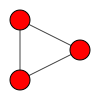

In [17]:
g = Graph.Isoclass(3,3)
ig.plot(g, bbox = (100, 100))

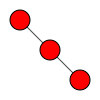

In [18]:
ig.plot(Graph.Isoclass(3,2), bbox=(100,100))

In [19]:
Graph.motifs_randesu(ppi, size=4)

KeyboardInterrupt: 

counts = [nan, nan, nan, nan, 1208083, nan, 999766, 108835, 2808, 3837, 2144]

In [21]:
counts4 = Graph.motifs_randesu(ppi, size=4, cut_prob=[0.9,0.8,0.7,0.5])
counts4

[nan, nan, nan, nan, 1186866, nan, 934969, 99309, 2597, 3795, 1827]

In [22]:
for i,c in enumerate(counts4):
    if not np.isnan(c):
        print(i,c)

4 1186866
6 934969
7 99309
8 2597
9 3795
10 1827


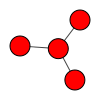

In [23]:
ig.plot(Graph.Isoclass(4,4), bbox=(100,100))

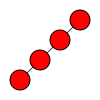

In [24]:
ig.plot(Graph.Isoclass(4,6), bbox=(100,100))

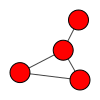

In [25]:
ig.plot(Graph.Isoclass(4,7), bbox=(100,100))

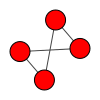

In [26]:
ig.plot(Graph.Isoclass(4,8), bbox=(100,100))

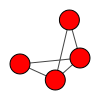

In [27]:
ig.plot(Graph.Isoclass(4,9), bbox=(100,100))

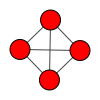

In [28]:
ig.plot(Graph.Isoclass(4,10), bbox=(100,100))

## Protein motifs

In [29]:
pmotifs.head()

,Gene ID,Orbit Signature,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73
0,1,12,1925,65,1,228182,19497,280706,210,596,...,142,0,120,0,0,0,0,0,0,0
1,10,24,4723,259,17,453121,95381,2467189,1678,1249,...,279,244,1021,28,3,54,1,1,0,0
2,100,32,5186,478,18,585573,141129,1444972,4449,2201,...,656,454,22088,553,8,301,1,169,1,0
3,1000,78,11189,2790,213,1332626,694166,3827388,62206,10013,...,15341,9178,224983,17453,3911,5949,200,5929,552,96
4,10000,76,11270,2624,226,1542635,689984,1626042,55589,19746,...,42472,17290,25317,11970,2960,10240,366,1706,359,43


In [30]:
pmotifs.describe()

,Gene ID,Orbit Signature,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73
count,2.255200e+04,22552.000000,22552.000000,2.255200e+04,22552.000000,2.255200e+04,2.255200e+04,2.255200e+04,2.255200e+04,2.255200e+04,...,2.255200e+04,2.255200e+04,2.255200e+04,2.255200e+04,2.255200e+04,2.255200e+04,2.255200e+04,2.255200e+04,2.255200e+04,2.255200e+04
mean,2.582002e+06,30.031571,4719.528201,2.359764e+03,318.549663,5.197298e+05,5.197298e+05,1.305885e+06,4.352951e+05,9.157916e+03,...,6.815916e+04,6.815916e+04,1.575168e+05,3.150336e+05,3.150336e+05,3.787604e+04,9.469010e+03,7.943411e+04,1.191512e+05,1.596120e+05
std,1.547417e+07,66.969864,8662.697806,2.891876e+04,1731.550422,9.626748e+05,3.913586e+06,2.054682e+06,1.626372e+07,5.126846e+04,...,7.065086e+05,5.278503e+05,8.627215e+05,2.240956e+06,3.644778e+06,2.972057e+05,1.159768e+05,5.880818e+05,1.358247e+06,1.338064e+06
min,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.534750e+03,2.000000,338.750000,0.000000e+00,0.000000,3.737325e+04,0.000000e+00,3.038100e+04,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.382850e+04,9.000000,1644.000000,2.800000e+01,3.000000,1.534095e+05,8.179500e+03,2.945340e+05,5.000000e+01,1.330000e+02,...,9.000000e+00,1.000000e+00,1.210000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.335645e+05,30.000000,5130.500000,3.820000e+02,44.000000,5.413622e+05,1.123032e+05,1.921222e+06,2.833250e+03,2.105000e+03,...,1.077000e+03,9.952500e+02,1.054600e+04,1.725250e+03,1.030000e+02,4.530000e+02,5.000000e+00,3.180000e+02,2.800000e+01,9.000000e+00
max,1.028003e+08,2130.000000,128448.000000,2.255358e+06,40639.000000,1.119295e+07,2.337301e+08,1.608145e+07,1.583236e+09,2.652566e+06,...,4.524413e+07,1.281856e+07,1.305796e+07,3.315589e+07,1.193462e+08,1.148420e+07,4.502431e+06,1.318002e+07,3.436924e+07,2.731577e+07
